### Statistics  Practical Implementation

1. Descriptive Statistics

Measure of Central Tendency:
* Mean
* Median
* Mode

In [109]:
ages = [23,24,32,45,12,43,67,45,32,56,32,120] # we have added 120 in the list to see how much the mean changes

In [110]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [111]:
# Another way to check
import statistics
print(statistics.mean(ages))
print(statistics.median(ages))
print(statistics.mode(ages)) # Mode is only available with statistics

44.25
37.5
32


<Axes: >

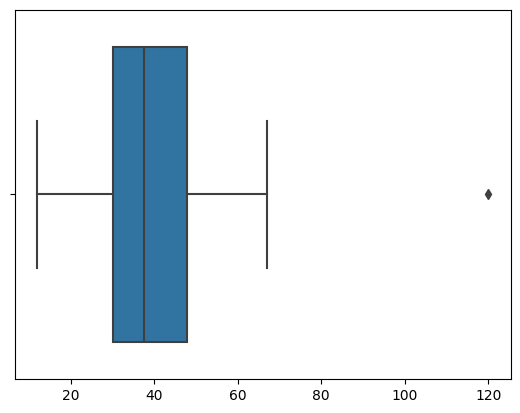

In [112]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(x=ages)

### 5 Number Summary

In [113]:
q1,q3 = np.percentile(ages,[25,75])
print(q1,q3)

30.0 47.75


In [114]:
##  Checking outliers[Lower fence,higher fence]
IQR = q3-q1
lower_fence = q1-1.5*(IQR)
higher_fence= q3+1.5*(IQR)
print ('The IQR is {}, Lower fence is {} and higher fence is {}'.format(IQR,lower_fence,higher_fence))

The IQR is 17.75, Lower fence is 3.375 and higher fence is 74.375


### Measure of Dispurtion
1. Variance
2. Standard Deviation

In [115]:
## There are two ways to check vairance but which one is reliable? As both shows different values
print(statistics.variance(ages)) # It uses sample variance formula where we divide by n-1
print(np.var(ages)) # it uses population variance formua where we divide by N

795.2954545454545
729.0208333333334


In [116]:
# Calculating the variance manually
def variance(data,dof):
    # defining n as length of data for count of numbers
    n=len(ages)
    # mean of the data
    mean=sum(data)/n
    # Variance
    deviation=[(x-mean)** 2 for x in data]
    variance=sum(deviation)/(n-dof)   # we can define degree of freedom 0 or 1 to switch between Populaion variance and sample variance
    return variance

In [117]:
variance(ages,dof=1)

795.2954545454545

In [118]:
## Or we can directly use statistics for population variance
statistics.pvariance(ages)

729.0208333333334

In [119]:
# to directly check standard deviation we can use math library as per formula std = square root of variance
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

### Histograms and PDF

<Axes: ylabel='Count'>

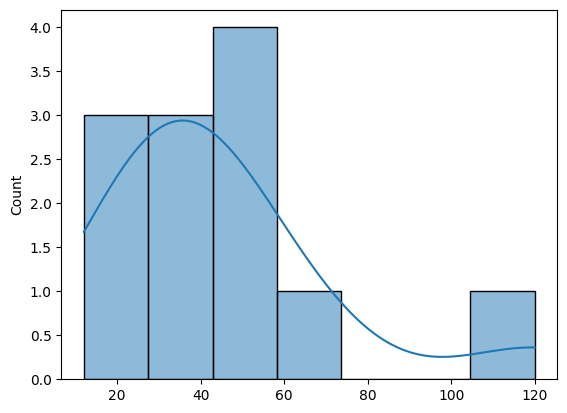

In [120]:
import seaborn as sns
sns.histplot(ages,kde=True) # KDE = kernel density estimator will create exponential smoothing curve on top of histplot

In [121]:
# Practice data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

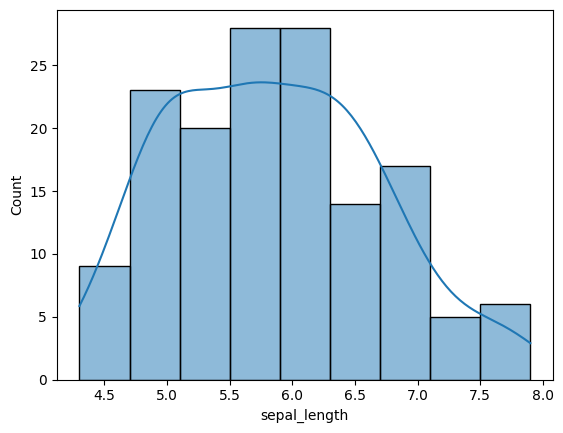

In [122]:
sns.histplot(df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

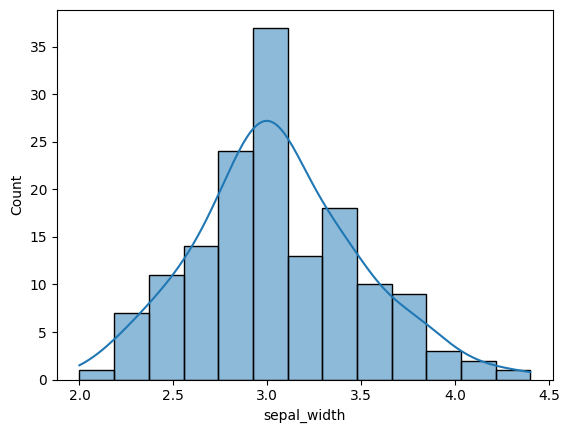

In [123]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

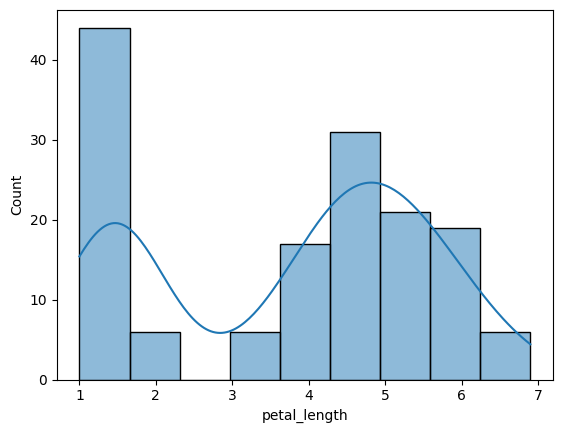

In [124]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

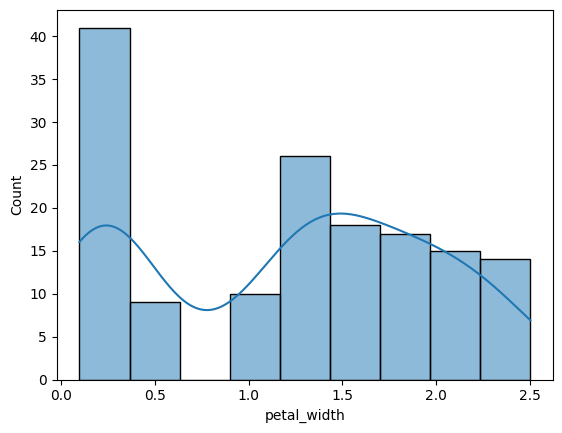

In [125]:
sns.histplot(df['petal_width'],kde=True)

### Creating a normal distrubted data

In [126]:
# np.random.normal(loc,scale,size) will create random normal distributions
# it takes 3 arguments (mean, standard deviation, size of the data)
s = np.random.normal(0.5,0.2,1000)
s

array([ 0.28846098,  0.22153681,  0.49369211,  0.79196246,  0.58897415,
        0.34479747,  0.68458165,  0.53854041,  0.22724171,  0.64039326,
        0.78849111,  0.58853511,  0.73416737,  0.34615616,  0.52172683,
        0.82639968,  0.77508941,  0.70406529,  0.28771601,  0.39509665,
        0.68486711,  0.35695296,  0.2818428 ,  0.63276944,  0.7356824 ,
        0.34759237,  0.64110754,  0.59141578,  0.34603252,  0.48100058,
        0.43974587,  0.54732553,  0.85239326,  0.35334406,  0.67879808,
        0.45972076,  0.74212962,  0.2843037 ,  0.5668639 ,  0.54649825,
        0.60844866,  0.25513033,  0.36587668,  0.74901699,  0.39108039,
        0.71487152,  0.47073713,  0.27094741,  0.81767211,  0.77202135,
        0.35087756,  0.37474374,  0.52467837,  0.56437235,  0.69809267,
        0.7187701 ,  0.51557145, -0.02648083,  0.42657132,  0.43461552,
        0.53238624,  0.40055703,  0.29027805,  0.3949836 ,  0.67143542,
        0.50505183,  0.44038532,  0.421738  ,  0.7235989 ,  0.65

<Axes: ylabel='Count'>

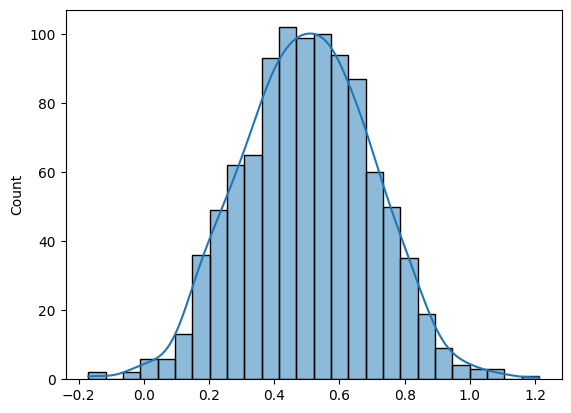

In [127]:
sns.histplot(s,kde=True)

### Log Normal Distribution

In [128]:
# we can replace normal with lognormmal and the paramters are same
mu, sigma = 3.,1. 
log_dist = np.random.lognormal(mu,sigma,1000)
log_dist

array([ 10.23446484,  89.22778122,  48.72848292,  27.93639781,
        20.62672098,   9.26786614,  39.88138238,   9.79320611,
        22.38075095,   2.14690757,   4.52614229,  27.13390892,
       172.33442406,  26.89437456,  25.19600921,  28.60851232,
        26.01408265,   1.94074478,  22.92888559,   4.29895523,
        21.99413637,  12.30596822,  22.67811965,  50.23851025,
         8.64800586,  15.63781509,   4.02542198,  18.96365362,
         3.73879446,  26.08657261,  19.36377521,  13.97098301,
         3.73523584,  11.17182186,  85.40446137,  12.08687704,
        23.29588518,  22.49618065,   5.55258504,  20.70663785,
        45.62777256,  14.62458643,   2.90270013,  36.47373475,
        13.41530371,   7.81098812,  29.90725193,   3.31248665,
        12.85675641,   8.16140721,  20.57768551,  43.38076137,
        67.33425282,   2.91477952,  25.55571866,  12.86425832,
        43.44527283,  12.56352959,  11.79475717,   2.77460233,
        83.49843604,  19.51749747,   6.2905418 ,  26.75

<Axes: ylabel='Count'>

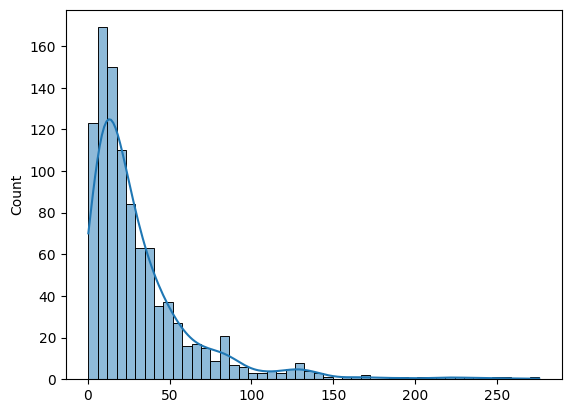

In [129]:
sns.histplot(log_dist,kde=True)

<Axes: ylabel='Count'>

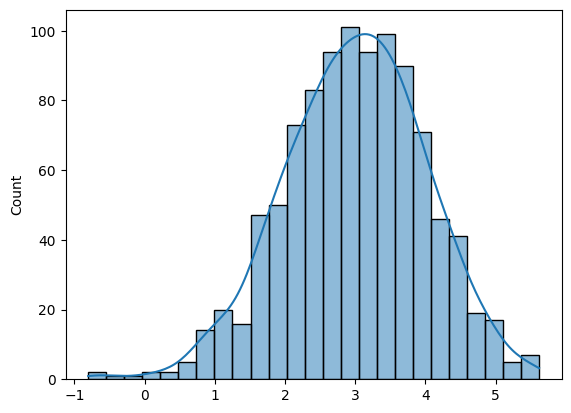

In [130]:
sns.histplot(np.log(log_dist),kde=True)

### Check whether a distribution is normal distribution

In [131]:
### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show

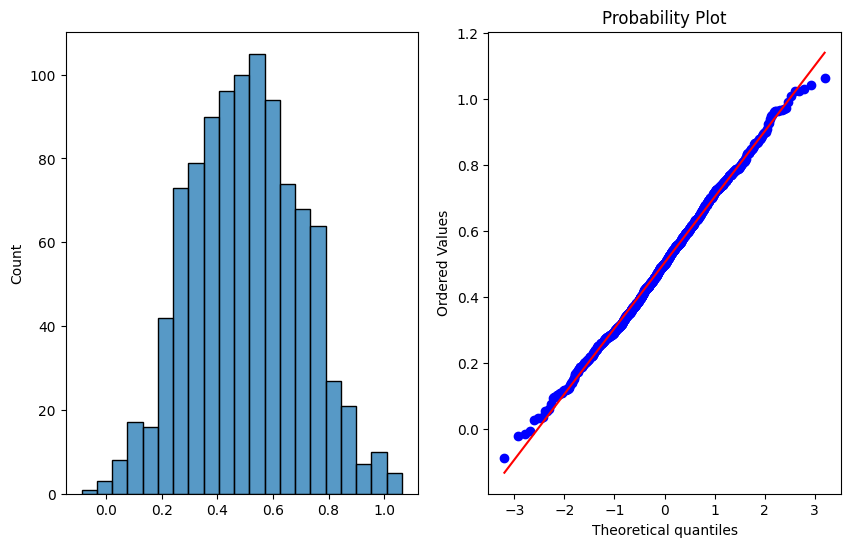

In [132]:
# Creating a normally distributed data
df1= np.random.normal(0.5,0.2,1000)
plot_data(df1)
# if probablity plot has straight line it means the data is normally distributed

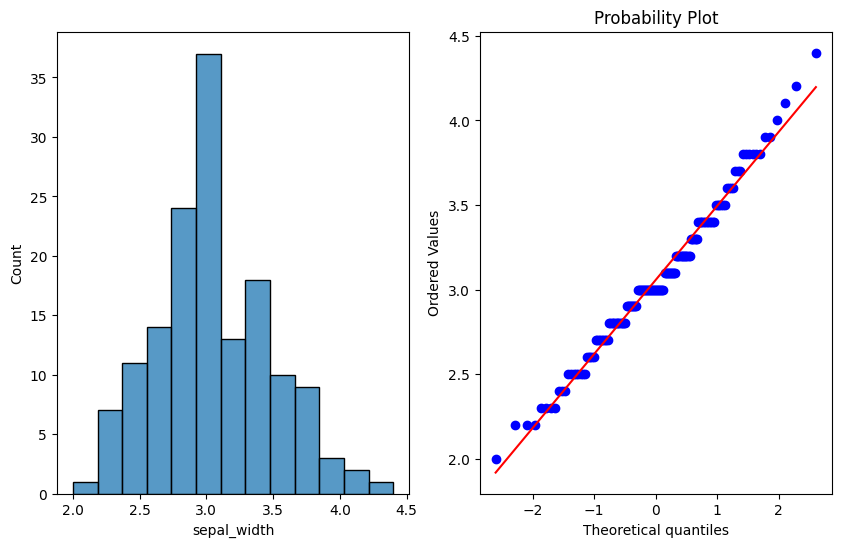

In [133]:
# Another example of normal distribution
plot_data(df['sepal_width'])

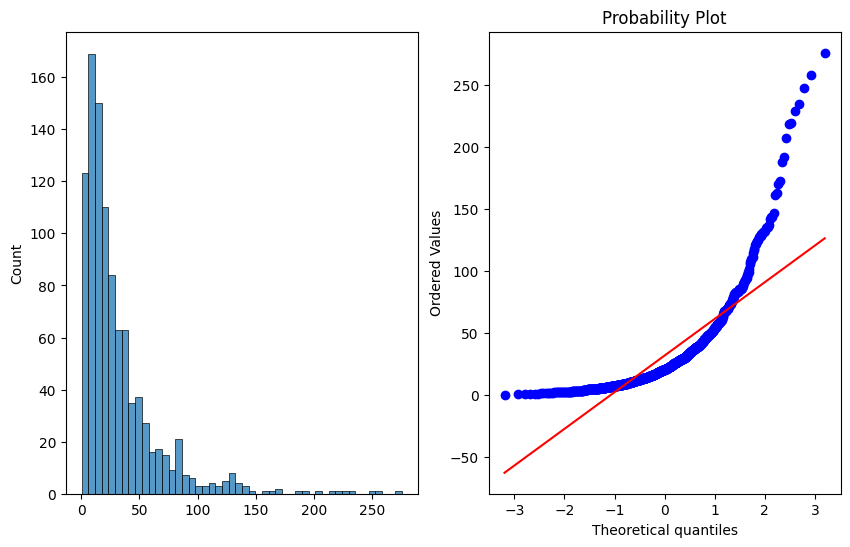

In [134]:
# plotting log distribution to check difference
plot_data(log_dist)

In [135]:
# To check log normal distribution,, we can simply add np.log in the probplot while passing data
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show

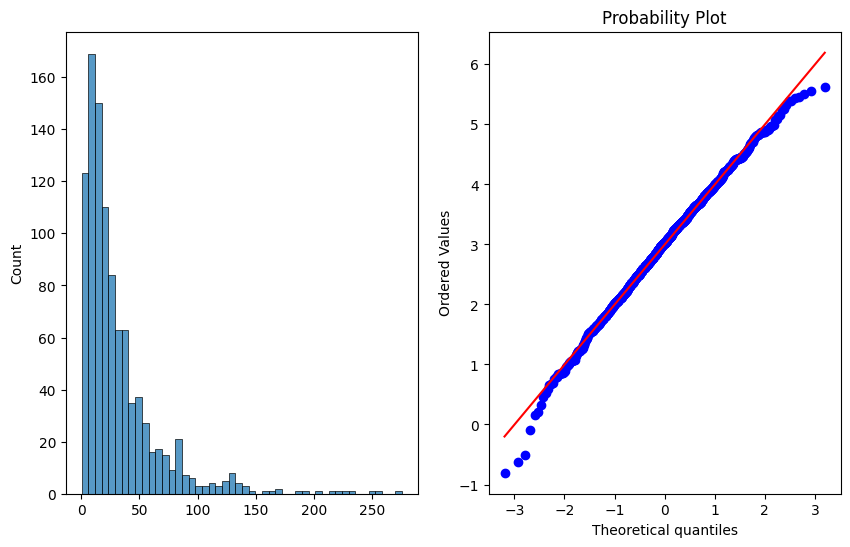

In [136]:
plot_data_log(log_dist)
# we will see a straight line in the probablity plot

### Pearson and Sperman Rank Correlation

In [137]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [138]:
import pandas as pd
# by default it will show correaltion as Pearson, we can change it to Sperman
df[['total_bill','tip','size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


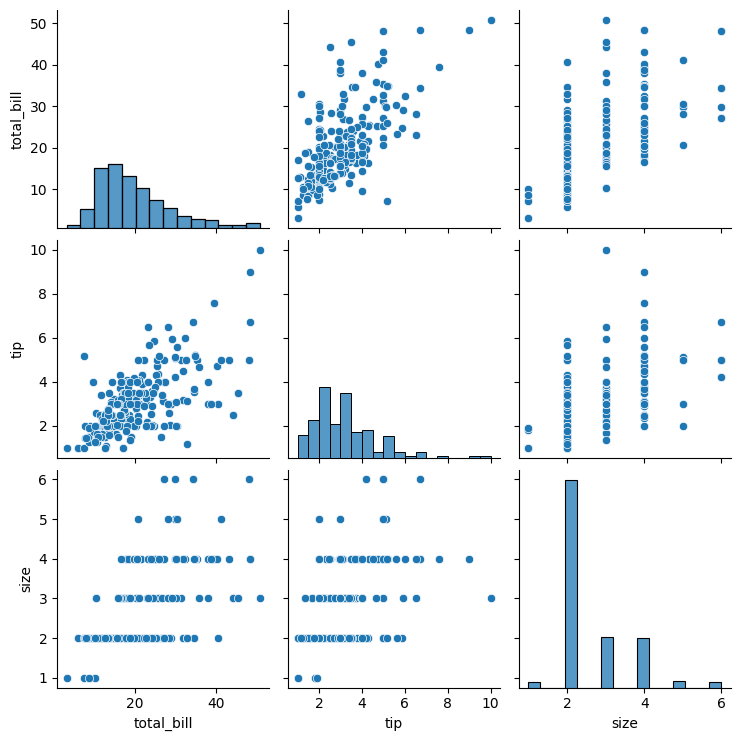

In [139]:
sns.pairplot(df)


<Axes: >

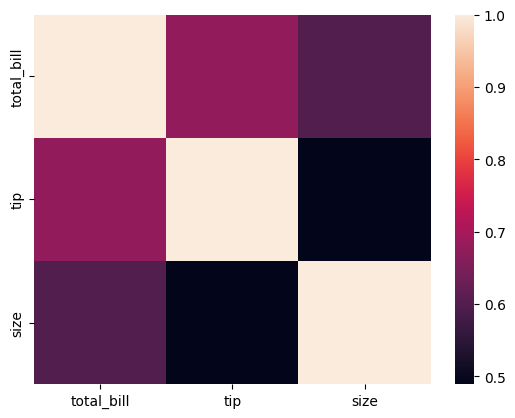

In [140]:
sns.heatmap(df[['total_bill','tip','size']].corr())